# K-Means

## Get Data

In [5]:
import pandas as pd

inputs = pd.read_csv(r'/Users/nashitaabd/Documents/SUTD/T6/MachineLearning/HW2/1/hw2-image.txt', delimiter=' ', names=['R', 'G', 'B'])

inputs

,R,G,B
0,129,108,61
1,117,96,51
2,102,77,36
3,94,64,26
4,97,59,22
...,...,...,...
210007,91,38,4
210008,88,39,6
210009,81,36,7
210010,71,31,6


In [6]:
x_input = inputs.as_matrix(columns=inputs.columns[0:])
x_input

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[129, 108,  61],
       [117,  96,  51],
       [102,  77,  36],
       ...,
       [ 81,  36,   7],
       [ 71,  31,   6],
       [ 66,  31,  11]])

## Distance Function
![alt text](dist.png "Title")

In [7]:
import math
def distance(x, y):
    d = len(x)
    sum = 0
    for i in range(d):
#         print(i)
        sum += int(math.pow((x[i]-y[i]),2))
    return sum

## Cost Function
![alt text](cost.png "Title")

In [8]:
def cost(clusters, z):
    cost = 0

    
    for i, cluster in enumerate(clusters):
        if(len(cluster)!=0):
            for j, x in enumerate(cluster):
                cost += distance(x, z[i])
        
    return cost
        

## Mean of a Cluster

In [9]:
def mean(cluster):
    n = len(cluster)
    result_z = []
    l = len(cluster[0])
    for i in range(l):
        total = 0
        for j, x in enumerate(cluster):
            total += x[i]
        result_z.append(int(total/n))
    return result_z
        

In [10]:
x_int = x_input.astype(int)

## K Means Algorithm
![alt text](km.png "Title")

In [11]:
# x.shape = 210012 rows × 3 columns
# z.shape = k rows x 3 columns
def k_means(x, k, z):
    clusters = [[] for i in range(k)]
    
    
    for i, xi in enumerate(x):
        min_distances = []
        dist = 1000000
        j_min = 0
        for j, zj in enumerate(z):
            if(dist>distance(xi, zj)):
                dist=distance(xi, zj)
                j_min = j
        clusters[j_min].append(xi)

    old_clusters = clusters.copy()
    old_z = [0,0,0]
    count =0
    
    cost_total = []
    while(old_z != z):
        count+=1
        print("iteration: ",count)
        old_clusters = clusters.copy()
        old_z = z.copy()
        print("new z = ",z)
        clusters = [[] for i in range(len(clusters))]
        for i, xi in enumerate(x):
            min_distances = []
            dist = 1000000
            j_min = 0
            for j, zj in enumerate(z):
                if(dist>distance(xi, zj)):
                    dist=distance(xi, zj)
                    j_min = j
            clusters[j_min].append(xi)

        
        z_removed = []
        for i, cluster in enumerate(clusters):
            if (len(cluster)!=0):
                z_removed.append(mean(cluster))
            
        for cluster in clusters:
            if(len(cluster)==0):
                clusters.remove(cluster)
        
        z = z_removed.copy()
        
        cost_total.append(cost(clusters,z))

    return clusters, z, cost_total
            

In [12]:
z = [ [255, 255, 255], 
     [255, 0, 0], 
     [128, 0, 0], 
     [0, 255, 0], 
     [0, 128, 0], 
     [0, 0, 255], 
     [0, 0,128], 
     [0,0,0]]
c, z, cost_total = k_means(x_int, 8, z)


iteration:  1
new z =  [[255, 255, 255], [255, 0, 0], [128, 0, 0], [0, 255, 0], [0, 128, 0], [0, 0, 255], [0, 0, 128], [0, 0, 0]]
iteration:  2
new z =  [[226, 208, 194], [203, 135, 77], [127, 64, 21], [92, 94, 89], [56, 56, 79], [29, 23, 22]]
iteration:  3
new z =  [[235, 231, 225], [189, 125, 74], [129, 61, 14], [114, 102, 92], [55, 49, 57], [34, 24, 20]]
iteration:  4
new z =  [[239, 236, 230], [186, 121, 70], [129, 59, 12], [121, 103, 91], [62, 45, 43], [34, 23, 19]]
iteration:  5
new z =  [[239, 236, 230], [185, 120, 68], [131, 59, 11], [124, 104, 90], [71, 41, 26], [31, 23, 20]]
iteration:  6
new z =  [[239, 236, 230], [185, 119, 68], [135, 61, 11], [124, 104, 90], [76, 36, 14], [26, 22, 22]]
iteration:  7
new z =  [[239, 236, 230], [185, 120, 68], [137, 63, 12], [122, 103, 90], [77, 36, 12], [25, 23, 23]]
iteration:  8
new z =  [[239, 236, 230], [185, 120, 69], [138, 63, 12], [120, 102, 90], [77, 36, 12], [25, 23, 23]]
iteration:  9
new z =  [[239, 236, 230], [185, 121, 69], [13

### Number of Clusters:

In [19]:
len(c)

6


### Final centroids of each cluster:


In [20]:
z

[[240, 238, 233],
 [193, 134, 88],
 [135, 60, 9],
 [154, 95, 50],
 [77, 36, 12],
 [25, 23, 23]]

### Number of pixels associated to each cluster:


In [21]:
for i, cluster in enumerate(c):
    print("Cluster ",i, " has ", len(cluster), " pixels.")

Cluster  0  has  4960  pixels.
Cluster  1  has  16412  pixels.
Cluster  2  has  52950  pixels.
Cluster  3  has  21777  pixels.
Cluster  4  has  40217  pixels.
Cluster  5  has  73696  pixels.


### Squared Euclidean distance from each pixel to the nearest centroid after every iteration of the algorithm:

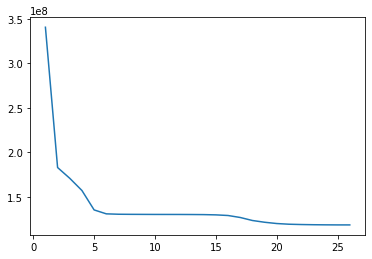

In [22]:
import matplotlib.pyplot as plt

import numpy as np

x = list(range(1, 27)) # 100 linearly spaced numbers
plt.plot(x, cost_total)
plt.show()

### Visualize result by replacing each pixel with the centroid to which it is closest, and displaying the resulting image.


[[[129 108  61]
  [117  96  51]
  [102  77  36]
  ...
  [ 43  24   9]
  [ 42  23   8]
  [ 41  22   7]]

 [[129 108  61]
  [117  96  51]
  [102  77  36]
  ...
  [ 43  24   9]
  [ 42  23   8]
  [ 41  22   7]]

 [[128 107  60]
  [117  96  51]
  [103  78  37]
  ...
  [ 43  24   9]
  [ 41  23   9]
  [ 40  22   8]]

 ...

 [[155  75  14]
  [157  77  14]
  [156  79  11]
  ...
  [ 81  36   7]
  [ 71  31   6]
  [ 66  31  11]]

 [[155  75  14]
  [157  77  14]
  [156  79  11]
  ...
  [ 81  36   7]
  [ 71  31   6]
  [ 66  31  11]]

 [[155  75  14]
  [156  76  13]
  [156  79  11]
  ...
  [ 81  36   7]
  [ 71  31   6]
  [ 66  31  11]]]


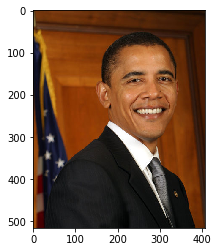

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

directory = '/Users/nashitaabd/Documents/SUTD/T6/MachineLearning/HW2/1/hw2-image.txt'
dataset = np.loadtxt(directory)

newdata = np.array(np.split(dataset,516))
newdata = newdata.astype('uint8')
print(newdata)


imgplot = plt.imshow(newdata)
plt.show()

In [38]:
from numpy import ndarray
new_array = [ [ None for y in range( len(newdata[i]) ) ] for x in range( len(newdata) ) ]

for i in range(len(newdata)):
    for j in range(len(newdata[i])):
        
        dist = 100000
        j_min = 0
        for k, zj in enumerate(z):
            if(dist>distance(newdata[i][j], zj)):
                dist=distance(newdata[i][j], zj)
                j_min = k
            new_array[i][j] = z[j_min]

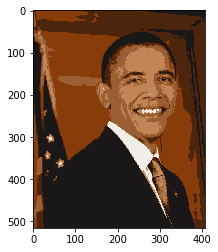

In [39]:
arr = np.asarray(new_array).astype('uint8') 
plt.imshow(arr)
plt.show()